<a href="https://colab.research.google.com/github/Schlager22/FDP_Course/blob/main/Preseason_Sleepers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Read in Underdog Draft data
import pandas as pd
import numpy as np
adp_df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2023/06-Data%20Munging/02-ADP%20Data%20-%20(2023.03.30).csv')

adp_df.head()

,Player,Pos,Team,Current ADP
0,Justin Jefferson,WR,MIN,1.1
1,Ja'Marr Chase,WR,CIN,2.3
2,Christian McCaffrey,RB,SF,3.0
3,Cooper Kupp,WR,LAR,4.8
4,Tyreek Hill,WR,MIA,5.1


In [5]:
# Add column for ADP Rank
adp_df['ADP RANK'] = adp_df['Current ADP'].rank()
adp_df['ADP RANK'] = adp_df['ADP RANK'].astype(int)
adp_df.head()

,Player,Pos,Team,Current ADP,ADP RANK
0,Justin Jefferson,WR,MIN,1.1,1
1,Ja'Marr Chase,WR,CIN,2.3,2
2,Christian McCaffrey,RB,SF,3.0,3
3,Cooper Kupp,WR,LAR,4.8,4
4,Tyreek Hill,WR,MIA,5.1,5


In [6]:
adp_df_cutoff = adp_df[:75]

# shape get's us back a tuple with the number of rows, and number of columns
# you can also use the Python built-in function len() to find the number of rows.

adp_df_cutoff.shape
# Could also use len()

(75, 5)

In [8]:
# initialize an empty dictionary.
# this is where we are going to save our replacement players

replacement_players = {
    'RB': '',
    'QB': '',
    'WR': '',
    'TE': ''
}

In [9]:
"""
We can iterate over our DataFrame using the iterrows method.

It's similar to the items method for dictionary looping.

Instead of key, values in dict.items(), we get back the index, row in df.items()

Here, we're using _ as the placeholder value for the index. Whenever you do not use a variable when looping,
you should use _ as a placeholder to tell yourself later and other people reading your code that this is a
dummy variable. This is good style.

Using iterrows, we can iterate over our DataFrame, and get access to each row's column values.

We can access these column value much like we would values in a dictionary, using the [] notation.

Here, we are constantly re-setting the keys in the dict we instantiated above with the most recent player from
our loop, if their position is in replacement_players keys (in other words, if they are a WR, RB, TE, or qb)

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html

"""
for _, row in adp_df_cutoff.iterrows():

    position = row['Pos'] # extract out the position and player value from each row as we loop through it
    player = row['Player']

    if position in replacement_players: # if the position is in the dict's keys
        replacement_players[position] = player # set that player as the replacement player

In [10]:
replacement_players

{'RB': 'Isiah Pacheco',
 'QB': 'Trevor Lawrence',
 'WR': 'Diontae Johnson',
 'TE': 'Dallas Goedert'}

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2023/06-Data%20Munging/01-FDP%20Projections%20-%20(2023.03.30).csv')

scoring_weights = {
    'receptions': 0.5, # half-PPR
    'receiving_yds': 0.1,
    'receiving_td': 6,
    'rushing_yds': 0.1,
    'rushing_td': 6,
    'passing_yds': 0.04,
    'passing_td': 4,
    'int': -2
}

df['FantasyPoints'] = (
    df['Receptions']*scoring_weights['receptions'] + df['ReceivingYds']*scoring_weights['receiving_yds'] + \
    df['ReceivingTD']*scoring_weights['receiving_td'] + \
    df['RushingYds']*scoring_weights['rushing_yds'] + df['RushingTD']*scoring_weights['rushing_td'] + \
    df['PassingYds']*scoring_weights['passing_yds'] + df['PassingTD']*scoring_weights['passing_td'] + \
    df['Int']*scoring_weights['int'] )

df.head()


,Player,Team,Pos,PassingYds,PassingTD,Int,RushingAtt,RushingYds,RushingTD,Receptions,ReceivingYds,ReceivingTD,FantasyPoints
0,Josh Allen,BUF,QB,4451,27,13,133,754,13,0,0,0,413.44
1,Patrick Mahomes,KAN,QB,5760,34,6,52,297,3,0,0,0,402.10
2,Jalen Hurts,PHI,QB,4010,19,10,184,1019,13,0,0,0,396.30
3,Joe Burrow,CIN,QB,5525,37,15,24,136,2,0,0,0,364.60
4,Lamar Jackson,BAL,QB,2902,31,4,190,1052,6,0,0,0,373.28


In [13]:
"""
df = df[columns_wed_like_to_keep_in_list_form]
"""
df = df[['Player', 'Pos', 'Team', 'FantasyPoints']] # filtering out the columns we need.
df.head()

,Player,Pos,Team,FantasyPoints
0,Josh Allen,QB,BUF,413.44
1,Patrick Mahomes,QB,KAN,402.10
2,Jalen Hurts,QB,PHI,396.30
3,Joe Burrow,QB,CIN,364.60
4,Lamar Jackson,QB,BAL,373.28


In [18]:
replacement_values = {} # initialize an empty dictionary

for position, player_name in replacement_players.items():

    player = df.loc[df['Player'] == player_name.strip()]
    # because this is a series object we get back, we need to use the tolist method
    # to get back the series as a list. The list object is of length 1, and the 1 item has the value we need.
    # we tack on a [0] to get the value we need.

    replacement_values[position] = player['FantasyPoints'].tolist()[0]

replacement_values

{'RB': 132.2, 'QB': 295.36, 'WR': 171.5, 'TE': 137.5}

In [15]:
replacement_players.items()

dict_items([('RB', 'Isiah Pacheco'), ('QB', 'Trevor Lawrence'), ('WR', 'Diontae Johnson'), ('TE', 'Dallas Goedert')])

In [19]:
# this will be explained in the next chapter
pd.set_option('chained_assignment', None)

df = df.loc[df['Pos'].isin(['QB', 'RB', 'WR', 'TE'])]

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
df['VOR'] = df.apply(
    lambda row: row['FantasyPoints'] - replacement_values.get(row['Pos']), axis=1
)

df.head()


,Player,Pos,Team,FantasyPoints,VOR
0,Josh Allen,QB,BUF,413.44,118.08
1,Patrick Mahomes,QB,KAN,402.10,106.74
2,Jalen Hurts,QB,PHI,396.30,100.94
3,Joe Burrow,QB,CIN,364.60,69.24
4,Lamar Jackson,QB,BAL,373.28,77.92


In [20]:
pd.set_option('display.max_rows', None) # turn off truncation of rows setting inherent to pandas
df['VOR Rank'] = df['VOR'].rank(ascending=False)
df['VOR Rank'] = df['VOR Rank'].astype(int)
df.sort_values(by='VOR', ascending=False).head(100)

,Player,Pos,Team,FantasyPoints,VOR,VOR Rank
45,Christian McCaffrey,RB,SFO,360.30,228.10,1
46,Jonathan Taylor,RB,IND,339.20,207.00,2
47,Austin Ekeler,RB,LAC,306.60,174.40,3
125,Justin Jefferson,WR,MIN,342.90,171.40,4
126,Ja'Marr Chase,WR,CIN,311.20,139.70,5
127,Cooper Kupp,WR,LAR,299.20,127.70,6
215,Travis Kelce,TE,KAN,257.80,120.30,7
0,Josh Allen,QB,BUF,413.44,118.08,8
48,Saquon Barkley,RB,NYG,248.60,116.40,9
49,Kenneth Walker III,RB,SEA,245.60,113.40,10


In [22]:
df.groupby('Pos')['VOR'].describe().transpose()

Pos,QB,RB,TE,WR
count,45.000000,80.000000,33.000000,90.000000
mean,-95.917333,-6.535000,-32.233333,-33.327778
std,111.345069,73.613386,46.110280,61.051051
min,-251.960000,-100.800000,-137.500000,-112.600000
25%,-186.400000,-68.550000,-64.900000,-83.425000
50%,-103.580000,-20.850000,-33.500000,-46.250000
75%,0.000000,39.550000,-9.500000,9.300000
max,118.080000,228.100000,120.300000,171.400000


In [23]:
# standard score example. Notice axis is not set to 1 as we are applying a function across a column here.
# df['VOR'] = df['VOR'].apply(lambda x: (x - df['VOR'].mean()) / df['VOR'].std())

df['VOR'] = df['VOR'].apply(lambda x: (x - df['VOR'].min()) / (df['VOR'].max() - df['VOR'].min()))

In [24]:
df = df.sort_values(by='VOR Rank')
df.head(100)


,Player,Pos,Team,FantasyPoints,VOR,VOR Rank
45,Christian McCaffrey,RB,SFO,360.30,1.000000,1
46,Jonathan Taylor,RB,IND,339.20,0.956047,2
47,Austin Ekeler,RB,LAC,306.60,0.888139,3
125,Justin Jefferson,WR,MIN,342.90,0.881890,4
126,Ja'Marr Chase,WR,CIN,311.20,0.815856,5
127,Cooper Kupp,WR,LAR,299.20,0.790859,6
215,Travis Kelce,TE,KAN,257.80,0.775445,7
0,Josh Allen,QB,BUF,413.44,0.770820,8
48,Saquon Barkley,RB,NYG,248.60,0.767321,9
49,Kenneth Walker III,RB,SEA,245.60,0.761072,10


In [26]:
df = df.rename({
    'VOR': 'Value',
    'VOR Rank': 'Value Rank'
}, axis=1)

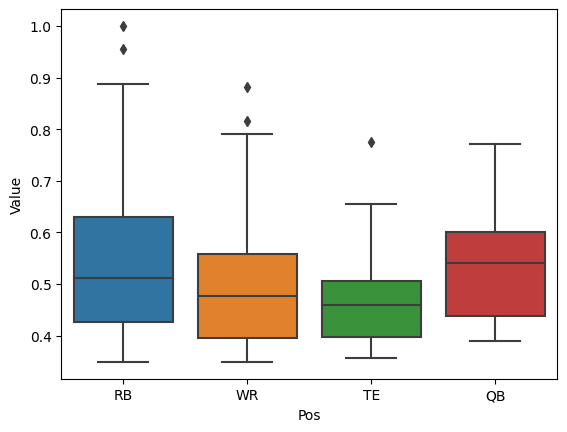

In [28]:
import seaborn as sns # in case you did not import it above

# calculating how many players are in our draft pool.
num_teams = 12
num_spots = 16 # 1 QB, 2RB, 2WR, 1TE, 1FLEX, 1K, 1DST, 7 BENCH
draft_pool = num_teams * num_spots

df_copy = df[:draft_pool]

sns.boxplot(x=df_copy['Pos'], y=df_copy['Value']);

In [29]:
adp_df = adp_df.rename({
    'PLAYER': 'Player',
    'POS': 'Pos',
    'AVG': 'Average ADP',
    'ADP RANK': 'ADP Rank'
}, axis=1) # let's rename some columns first.

adp_df = adp_df.drop('Team', axis=1)

In [30]:
df['Player'] = df['Player'].replace({
    'Kenneth Walker III': 'Kenneth Walker',
    'Travis Etienne Jr.': 'Travis Etienne',
    'Brian Robinson Jr.': 'Brian Robinson',
    'Pierre Strong Jr.': 'Pierre Strong',
    'Michael Pittman Jr.': 'Michael Pittman',
    'A.J. Dillon': 'AJ Dillon',
    'D.J. Moore': 'DJ Moore'
})

In [31]:
final_df = df.merge(adp_df, how='left', on=['Player', 'Pos'])

final_df.head(100)

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Current ADP,ADP Rank
0,Christian McCaffrey,RB,SFO,360.30,1.000000,1,3.0,3.0
1,Jonathan Taylor,RB,IND,339.20,0.956047,2,11.2,11.0
2,Austin Ekeler,RB,LAC,306.60,0.888139,3,12.7,12.0
3,Justin Jefferson,WR,MIN,342.90,0.881890,4,1.1,1.0
4,Ja'Marr Chase,WR,CIN,311.20,0.815856,5,2.3,2.0
5,Cooper Kupp,WR,LAR,299.20,0.790859,6,4.8,4.0
6,Travis Kelce,TE,KAN,257.80,0.775445,7,6.2,6.0
7,Josh Allen,QB,BUF,413.44,0.770820,8,19.1,18.0
8,Saquon Barkley,RB,NYG,248.60,0.767321,9,14.2,14.0
9,Kenneth Walker,RB,SEA,245.60,0.761072,10,22.2,22.0


In [34]:
final_df['Diff in ADP and Value'] = final_df['ADP Rank'] - final_df['Value Rank']

#removing outliers in ADP
final_df = final_df.loc[final_df['ADP Rank'] <= 212]

final_df.head()

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Current ADP,ADP Rank,Diff in ADP and Value
0,Christian McCaffrey,RB,SFO,360.3,1.000000,1,3.0,3.0,2.0
1,Jonathan Taylor,RB,IND,339.2,0.956047,2,11.2,11.0,9.0
2,Austin Ekeler,RB,LAC,306.6,0.888139,3,12.7,12.0,9.0
3,Justin Jefferson,WR,MIN,342.9,0.881890,4,1.1,1.0,-3.0
4,Ja'Marr Chase,WR,CIN,311.2,0.815856,5,2.3,2.0,-3.0


In [36]:
# Create draft pool for each player
draft_pool = final_df.sort_values(by='ADP Rank')[:196]

rb_draft_pool = draft_pool.loc[draft_pool['Pos'] == 'RB']
qb_draft_pool = draft_pool.loc[draft_pool['Pos'] == 'QB']
wr_draft_pool = draft_pool.loc[draft_pool['Pos'] == 'WR']
te_draft_pool = draft_pool.loc[draft_pool['Pos'] == 'TE']

In [37]:
# top 10 RB sleepers for this year's draft
rb_draft_pool.sort_values(by='Diff in ADP and Value', ascending=False)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Current ADP,ADP Rank,Diff in ADP and Value
69,Leonard Fournette,RB,FA,134.3,0.529226,70,182.0,182.0,112.0
104,Jerick McKinnon,RB,KAN,110.6,0.479857,105,209.7,206.0,101.0
130,Chuba Hubbard,RB,CAR,86.1,0.428821,131,210.7,207.0,76.0
122,Michael Carter,RB,NYJ,90.4,0.437779,123,201.7,199.0,76.0
99,Devin Singletary,RB,HOU,111.5,0.481731,100,173.3,173.0,73.0
70,Antonio Gibson,RB,WAS,134.1,0.528809,71,141.0,141.0,70.0
76,Ezekiel Elliott,RB,FA,127.7,0.515477,77,147.3,146.0,69.0
80,Kareem Hunt,RB,CLE,124.5,0.508811,81,150.4,148.0,67.0
38,Alvin Kamara,RB,NOR,167.9,0.599217,39,104.6,105.0,66.0
35,James Conner,RB,ARI,171.1,0.605883,36,101.5,100.0,64.0


In [39]:
# top 10 WR sleepers for this year's draft
wr_draft_pool.sort_values(by='Diff in ADP and Value', ascending=False)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Current ADP,ADP Rank,Diff in ADP and Value
138,Rondale Moore,WR,ARI,119.9,0.417364,139,155.5,156.0,17.0
166,Chase Claypool,WR,CHI,98.8,0.373412,167,175.2,176.0,9.0
48,Chris Godwin,WR,TB,192.7,0.569012,49,56.2,56.0,7.0
186,Robert Woods,WR,HOU,88.6,0.352164,187,195.4,193.0,6.0
159,Hunter Renfrow,WR,LVR,104.8,0.385910,160,168.4,166.0,6.0
62,Mike Evans,WR,TB,181.4,0.545473,63,64.9,65.0,2.0
71,Diontae Johnson,WR,PIT,171.5,0.524851,73,74.3,74.0,1.0
187,Mecole Hardman,WR,NYJ,87.9,0.350706,188,188.2,189.0,1.0
165,Nico Collins,WR,HOU,100.3,0.376536,166,166.2,165.0,-1.0
49,Keenan Allen,WR,LAC,192.1,0.567762,50,50.1,48.0,-2.0


In [40]:
# top 10 TE sleepers for this year's draft
te_draft_pool.sort_values(by='Diff in ADP and Value', ascending=False)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Current ADP,ADP Rank,Diff in ADP and Value
125,Noah Fant,TE,SEA,94.5,0.435279,126,204.5,202.0,76.0
110,Trey McBride,TE,ARI,107.9,0.463192,111,186.4,184.0,73.0
116,Gerald Everett,TE,LAC,98.6,0.443820,117,181.4,181.0,64.0
106,Tyler Higbee,TE,LAR,111.5,0.470691,107,172.9,171.0,64.0
146,Hayden Hurst,TE,CIN,80.2,0.405491,147,197.9,197.0,50.0
92,Greg Dulcich,TE,DEN,121.0,0.490480,93,141.8,143.0,50.0
84,Dalton Schultz,TE,HOU,128.0,0.505062,85,127.9,128.0,43.0
169,Jelani Woods,TE,IND,64.2,0.372162,170,213.0,212.0,42.0
157,Isaiah Likely,TE,BAL,70.9,0.386118,158,197.3,195.0,37.0
144,Mike Gesicki,TE,MIA,80.4,0.405908,145,178.8,179.0,34.0


In [41]:
# top 10 QB sleepers for this year's draft
qb_draft_pool.sort_values(by='Diff in ADP and Value', ascending=False)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Current ADP,ADP Rank,Diff in ADP and Value
57,Daniel Jones,QB,NYG,311.30,0.558055,58,98.0,99.0,41.0
66,Kirk Cousins,QB,MIN,303.72,0.542266,67,104.9,106.0,39.0
50,Dak Prescott,QB,DAL,315.90,0.567637,51,85.9,85.0,34.0
19,Lamar Jackson,QB,BAL,373.28,0.687164,20,50.2,50.0,30.0
67,Tua Tagovailoa,QB,MIA,302.66,0.540057,68,94.5,93.0,25.0
21,Joe Burrow,QB,CIN,364.60,0.669083,22,38.8,38.0,16.0
100,Trey Lance,QB,SFO,274.56,0.481523,101,116.6,115.0,14.0
127,Kyler Murray,QB,ARI,251.86,0.434237,128,139.6,140.0,12.0
7,Josh Allen,QB,BUF,413.44,0.770820,8,19.1,18.0,10.0
46,Justin Herbert,QB,LAC,320.36,0.576928,47,55.3,55.0,8.0


In [42]:
# top 10 QB overvalued for this year's draft
qb_draft_pool.sort_values(by='Diff in ADP and Value', ascending=True)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Current ADP,ADP Rank,Diff in ADP and Value
242,Anthony Richardson,QB,FA,58.70,0.031871,243,151.0,149.0,-94.0
230,Bryce Young,QB,FA,147.32,0.216473,231,150.2,147.0,-84.0
234,Jordan Love,QB,GNB,111.74,0.142357,235,153.5,155.0,-80.0
228,Jimmy Garoppolo,QB,LVR,163.32,0.249802,229,173.0,172.0,-57.0
221,Kenny Pickett,QB,PIT,191.78,0.309086,222,169.4,169.0,-53.0
156,Aaron Rodgers,QB,GNB,230.26,0.389243,157,114.1,113.0,-44.0
202,Matthew Stafford,QB,LAR,205.06,0.336750,203,163.5,163.0,-40.0
150,Jared Goff,QB,DET,234.94,0.398992,151,118.9,118.0,-33.0
222,Mac Jones,QB,NWE,191.68,0.308878,223,194.6,192.0,-31.0
152,Russell Wilson,QB,DEN,233.50,0.395992,153,125.9,125.0,-28.0
